#  Project California Housing Prices :

# Table of contents :


### Introduction:

California housing prices have long been a topic of interest and discussion due to the state's dynamic real estate market and its significance in the broader U.S. economy. The housing market in California is characterized by a complex interplay of factors, including population growth, economic trends, geographic constraints, and regulatory influences. Understanding the dynamics of California's housing prices requires consideration of various elements that shape this critical aspect of the state's economic landscape.

## Analysis of the DataSet (questions that is analyized in the dataset):

 Question 1 : Relation between ocean_proximity and housing_median_age
 Question 2 : Relation between total_rooms and population
 Question 3 :   creating a histogram for the dataframe "df1"
 Question 4: creating the kidplot for distribution display of specific column
 Question 5 : getting the value counts to show the bar chart
 Question 6 : correlations between latitude,longitude and median_income
 Question 7: Count number of households for each location in the dataset
 Question 8: mean ocean proximity for median_income
 Question 9: ocean_proximity per households
 Question 10: ocean_proximity per housing_median_age

In [143]:
# import packages to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Import necessary libraries
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score





%matplotlib inline

# columns detailed
## 1. longitude: 
#### A measure of how far west a house is; a higher value is farther west
## 2. latitude:
#### A measure of how far north a house is; a higher value is farther north
## 3. housingMedianAge: 
#### Median age of a house within a block; a lower number is a newer building
## 4. totalRooms:
#### Total number of rooms within a block
## 5. totalBedrooms: 
#### Total number of bedrooms within a block
## 6. population: 
#### Total number of people residing within a block
## 7. households: 
#### Total number of households, a group of people residing within a home unit, for a block
## 8. medianIncome: 
#### Median income for households within a block of houses (measured in tens of thousands of US Dollars)
## 9. medianHouseValue:
#### Median house value for households within a block (measured in US Dollars)
## 10. oceanProximity: 
#### Location of the house w.r.t ocean/sea


# General properities :


In [4]:
# Load csv file named tmdb-movies.csv' into data frame DF
df1 = pd.read_csv(r"D:\new folder22\housing.csv")

## dimensions of DF
print("Dimensions of DF: ", df1.shape)

## print Information of DF
print("\nInformation about DF: ")
print(df1.info())

## First fifth rows of DF
print("\nHead of DF: \n", df1.head(6))

Dimensions of DF:  (20640, 10)

Information about DF: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Head of DF: 
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86    

#  Data cleaning :

identifying and correcting (or removing) errors and inconsistencies in datasets to improve their quality. 
Handling Missing Data,Correcting Inaccurate Data,Standardizing Formats,Handling Duplicates,Dealing with Outliers,Normalization and Scaling

# Problems with the dataset :

There is a column "total_bedrooms" contain empty cells -->> fill this empty cells with the "mean"

In [43]:
x=df1["total_bedrooms"].mean()
df1["total_bedrooms"].fillna(x,inplace=True)

# 1 checking null values :

In [44]:
df1.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# 2- Remove duplication in the rows (check and process if exist) -- there is no duplicated rows

In [45]:
# Number of rows 
print(f"Current Number of rows : {df1.shape[0]}" )
# check Rows Duplication
duplicated_rows = sum(df1.duplicated())
print(f"Number of Duplicated rows : {duplicated_rows}" )
if(duplicated_rows):
    df1.drop_duplicates(keep ='first', inplace=True) 
    
print(f"New Number of rows after Removing duplication : {df1.shape[0]}")

Current Number of rows : 20640
Number of Duplicated rows : 0
New Number of rows after Removing duplication : 20640


In [46]:
#show columns that has nan value 
df1.info()
#sum of nan in each column 
df1.isna().sum
#to fill non value
df1. fillna(1, inplace=True)
#after fillna
df1.isna().sum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<bound method NDFrame._add_numeric_operations.<locals>.sum of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
20635      False     False               False        False           False   
20636      False     False               False        False           False   
20637      False     False               False        False           False   
20638      False     False               False        False           False   
20639      False     False               False        False          

### Exploratory Data Analysis :

#### Descriptive statistics about data :

In [47]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#  3 Noisy data should be removed from the rows if it exists:

In [48]:
# Number of Rows before removing rows contains zero value in 'columns
print(" Rows number before removing noisy data: ", df1.shape[0])
# drop rows where value of a specific column is zero
df1.drop(df1.index[df1['ocean_proximity'] == 0], inplace = True)

# drop rows where value of a 'rent_price' column is zero
df1.drop(df1.index[df1['median_income'] == 0], inplace = True)

# Number of Rows after removing rows contains zero value in 'buy_price' and 'rent_price' columns
print("Number of rows after removing noisy data: ", df1.shape[0])

 Rows number before removing noisy data:  20640
Number of rows after removing noisy data:  20640


In [49]:
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Boxplot visualisation
sns.catplot(x='ocean_proximity',   y='housing_median_age', data=df1, kind='box')

 ## Research question 1 : Relation between ocean_proximity and housing_median_age
 ####### coming boxplot shows the relation between the Location of the house [ocean_proximity] and [Median age of a house] within a block -> a lower number is a newer building

C:\Users\hadee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


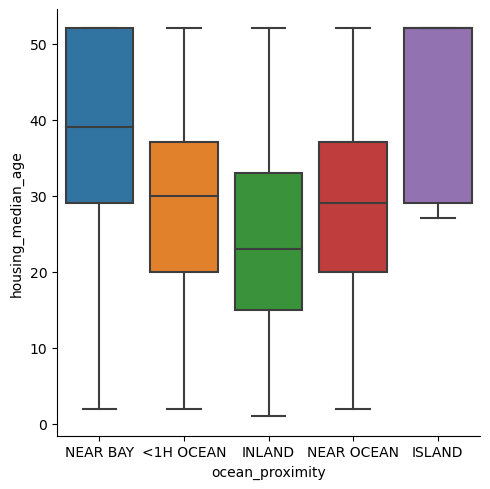

In [50]:
#Boxplot visualisation
sn.catplot(x='ocean_proximity',   y='housing_median_age', data=df1, kind='box')

A box plot shows the distribution of a numerical variable across different categories.
The result of this code is a box plot that shows the median age of the houses in different locations near the ocean. we can see how the median age varies across the categories and compare the spread and outliers of each group.

# scatter visualisation:
## Research question 2 : Relation between total_rooms and population



A scatter plot shows the relationship between two numerical variables by plotting them as dots on a Cartesian plane

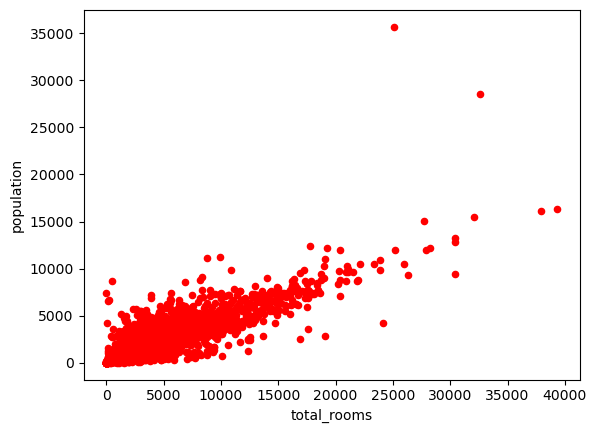

In [51]:
#scatter plot between the total_rooms and the population
df1.plot(x= 'total_rooms' ,y='population' ,kind='scatter' , color = 'red')
plt.show()


 this scatter plot shows the population versus the total number of rooms in different houses.  we can see how the two variables are correlated and if there are any outliers or clusters in the data

C:\Users\hadee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


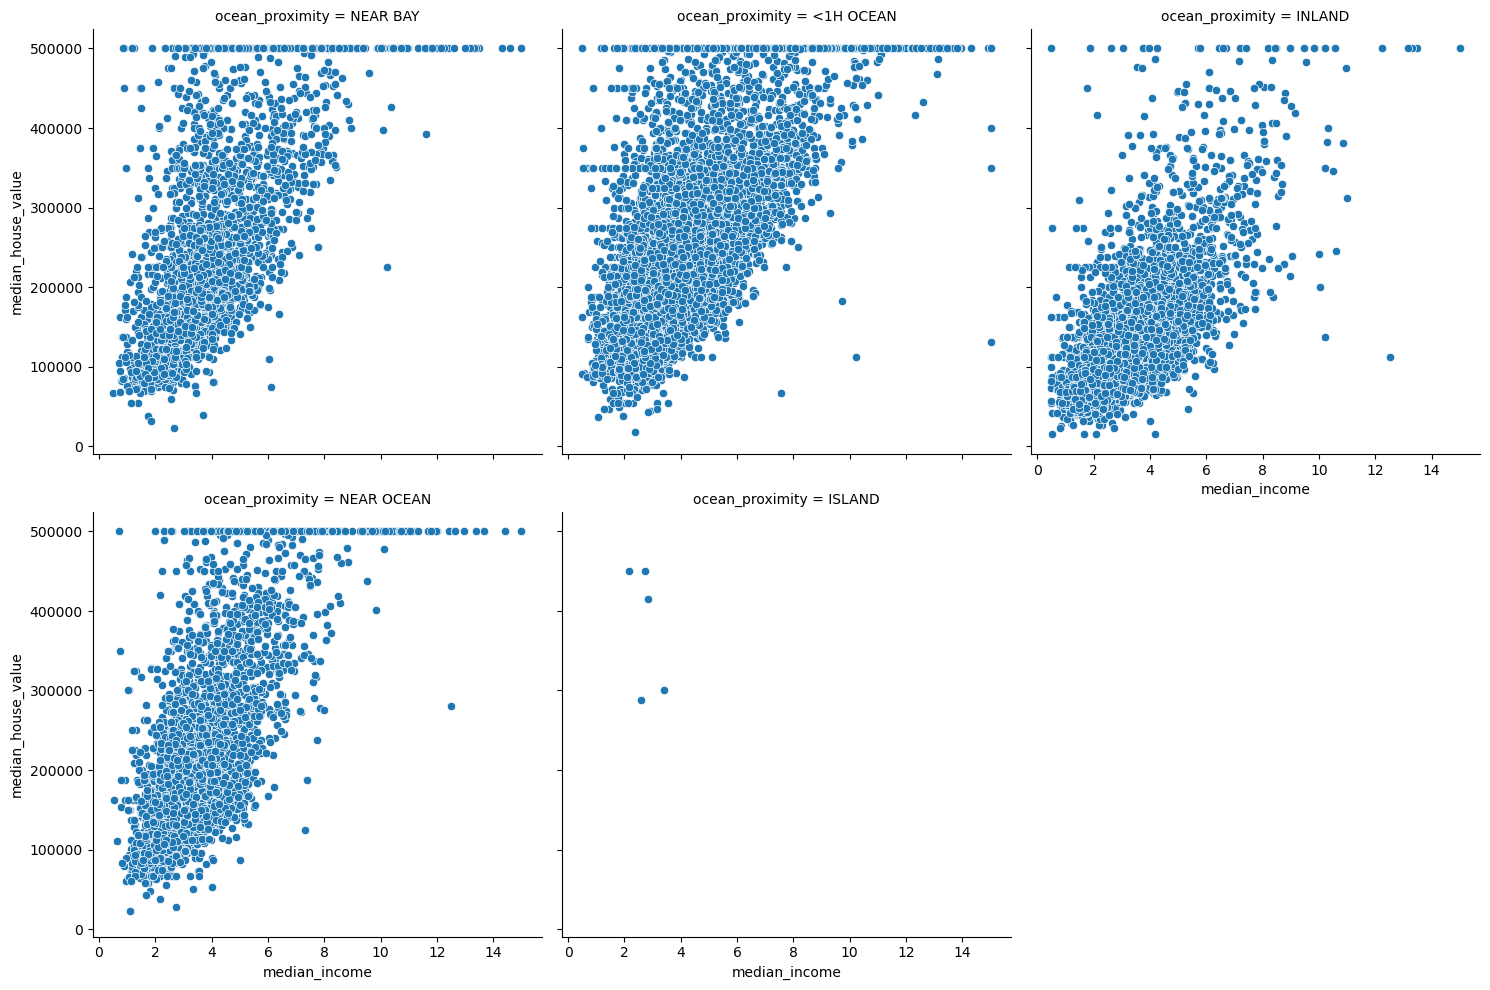

In [52]:
#Scatter plot between median_income and median_house_value by Transaction_amount 
sn.relplot(kind='scatter',x='median_income',y='median_house_value',data=df1,col='ocean_proximity',col_wrap=3)
plt.show()

# Histogram visualisation:
## Research question 3 :   creating a histogram for the dataframe "df1"

 A histogram is a graphical representation of the distribution of numerical data. It shows how often each value or range of values occurs in the data.

<function matplotlib.pyplot.show(close=None, block=None)>

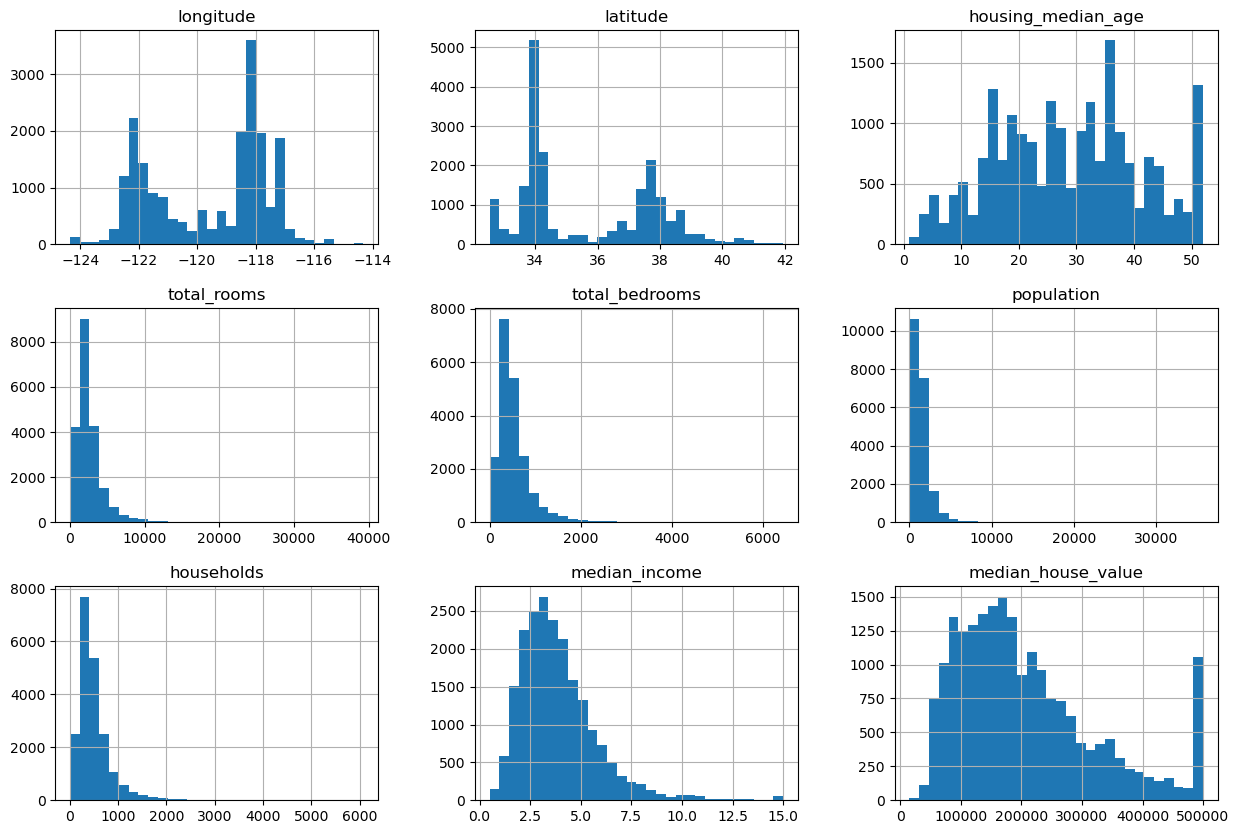

In [53]:
#Draw Histogram
df1.hist(bins=30 , figsize=(15,10))
plt.show

The pervious example is a histogram that shows the frequency of each value or range of values in the data frame. You can see the shape and spread of the data, and identify any outliers or gaps. 

# Kdeplot visualization:
## Research question 4: creating the kidplot for distribution display of specific column

it is about comparing how they vary across different categories or conditions. A kedplot can also be used to show the relationship between two variables by plotting their joint distribution as a contour plot.

C:\Users\hadee\AppData\Local\Temp\ipykernel_1428\2338613945.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(df1.longitude, color='yellow', shade='True');


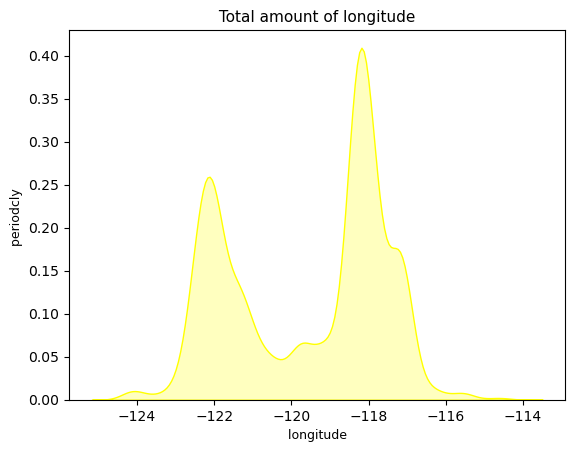

In [54]:
# Use Kdeplot for displying the distribution of runtime column 
sn.kdeplot(df1.longitude, color='yellow', shade='True');
#x-axis 
plt.xlabel(' longitude ', fontsize = 9)
#y-axis 
plt.ylabel('periodcly ', fontsize=9)
#title of the graph
plt.title(' Total amount of longitude ', fontsize=11)
# show plot
plt.show()

This example shows the distribution of the longitude in our data frame . You can see the shape and spread of the data, and identify the mode and outliers. 

# Bar chart visualisation:
## Research question 5 : getting the value counts to show the bar chart 

A bar chart is a type of data visualization that displays data using rectangular bars. Each bar represents a specific category or group, and the height or length of the bar corresponds to the value of that category or group

In [55]:
df1['median_income'].value_counts().values

array([49, 49, 46, ...,  1,  1,  1], dtype=int64)

Get the values and labels from the value_counts() method: This method returns a Series object that contains the counts of unique values in a column of a DataFrame

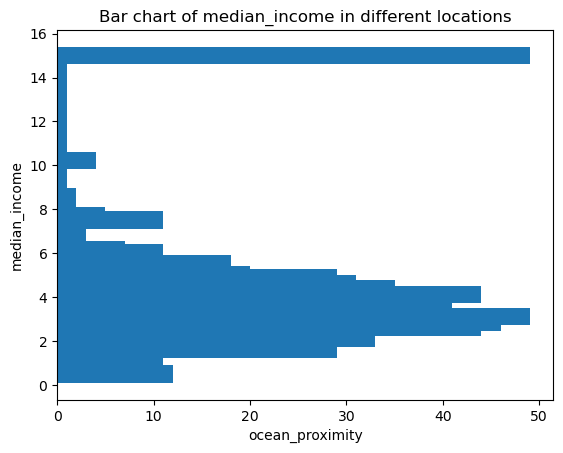

In [56]:
# Get the values and labels from the value_counts() method
ocean_proximity, median_income = df1['median_income'].value_counts().index.tolist(), df1['median_income'].value_counts().values.tolist()

# Create a horizontal bar chart
plt.barh(ocean_proximity, median_income)
plt.title("Bar chart of median_income in different locations")
plt.xlabel("ocean_proximity")
plt.ylabel("median_income")
plt.show()

Create a horizontal bar chart: You are using the plt.barh() function to create a horizontal bar chart. The parameters determine the positions and lengths of the bars. You are also using the plt.title(), plt.xlabel(), and plt.ylabel() functions to add a title and labels to the plot

# Research Question 6 : correlations between latitude,longitude and median_income

A heatmap is a graphical representation of data where the values are shown by different colors.

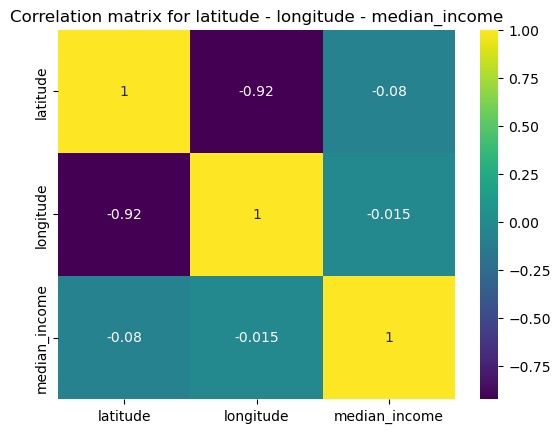

In [57]:
# construct df1_ from three columns of the DF (latitude, longitude, and median_income)
df_ = df1[['latitude','longitude', 'median_income']]
# compute correlation using pearson correlation cofficient
corr_mat=df_.corr(method='pearson')

#draw the heatmap
sn.heatmap(corr_mat, cmap='viridis' , annot = True)
#set title
plt.title("Correlation matrix for latitude - longitude - median_income")
# show plot
plt.show()

From the heatmap, we can observe the following:

1-The diagonal line of the matrix has the value of 1, indicating that each variable has a perfect positive correlation with itself.
2-The latitude and longitude variables have a strong negative correlation of -0.92, meaning that as one increases, the other decreases. This is indicated by the dark purple color on the heatmap.
3-The median_income and longitude variables have a weak negative correlation of -0.015, meaning that there is no significant linear relationship between them. This is indicated by the greenish color on the heatmap.
4-The median_income and latitude variables have a weak positive correlation of 0.08, meaning that there is also no significant linear relationship between them. This is indicated by another greenish color on the heatmap..

# Research Question 7: Count number of households for each location in the dataset

Compute count Number of households for each location: we are trying to analyze the distribution of households in different locations in a the dataset df1

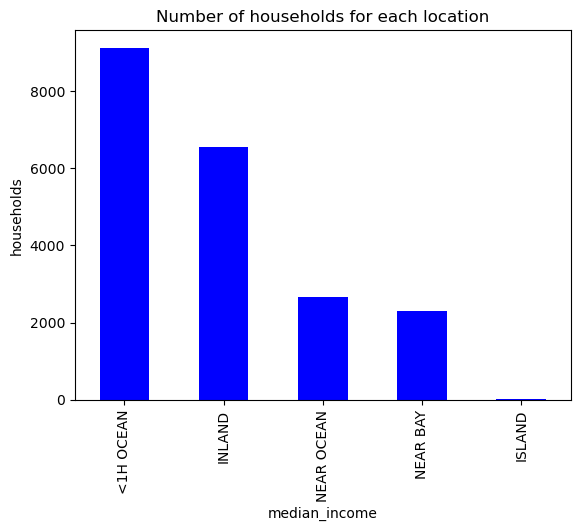

In [58]:
# compute count Number of households for each location
# create a new dataframe with splitting values in ocean_proximity column 
genres_df1 = df1.assign(genres_=df1['ocean_proximity'].str.split('|')).explode('ocean_proximity')
# count each type of a value in the new DF column names "ocean_proximity"
genres_df1['ocean_proximity'].value_counts().plot(kind='bar', color='blue', title='Number of households for each location'
                                         , xlabel='median_income', ylabel='households');

from above we can see that INLAND and <1H OCEAN  have the highest households

# Research Question 8: mean ocean proximity for median_income 

creating a custom function called plot that takes seven parameters: graph, xvec, yvec, xlabel, ylabel, title, and op

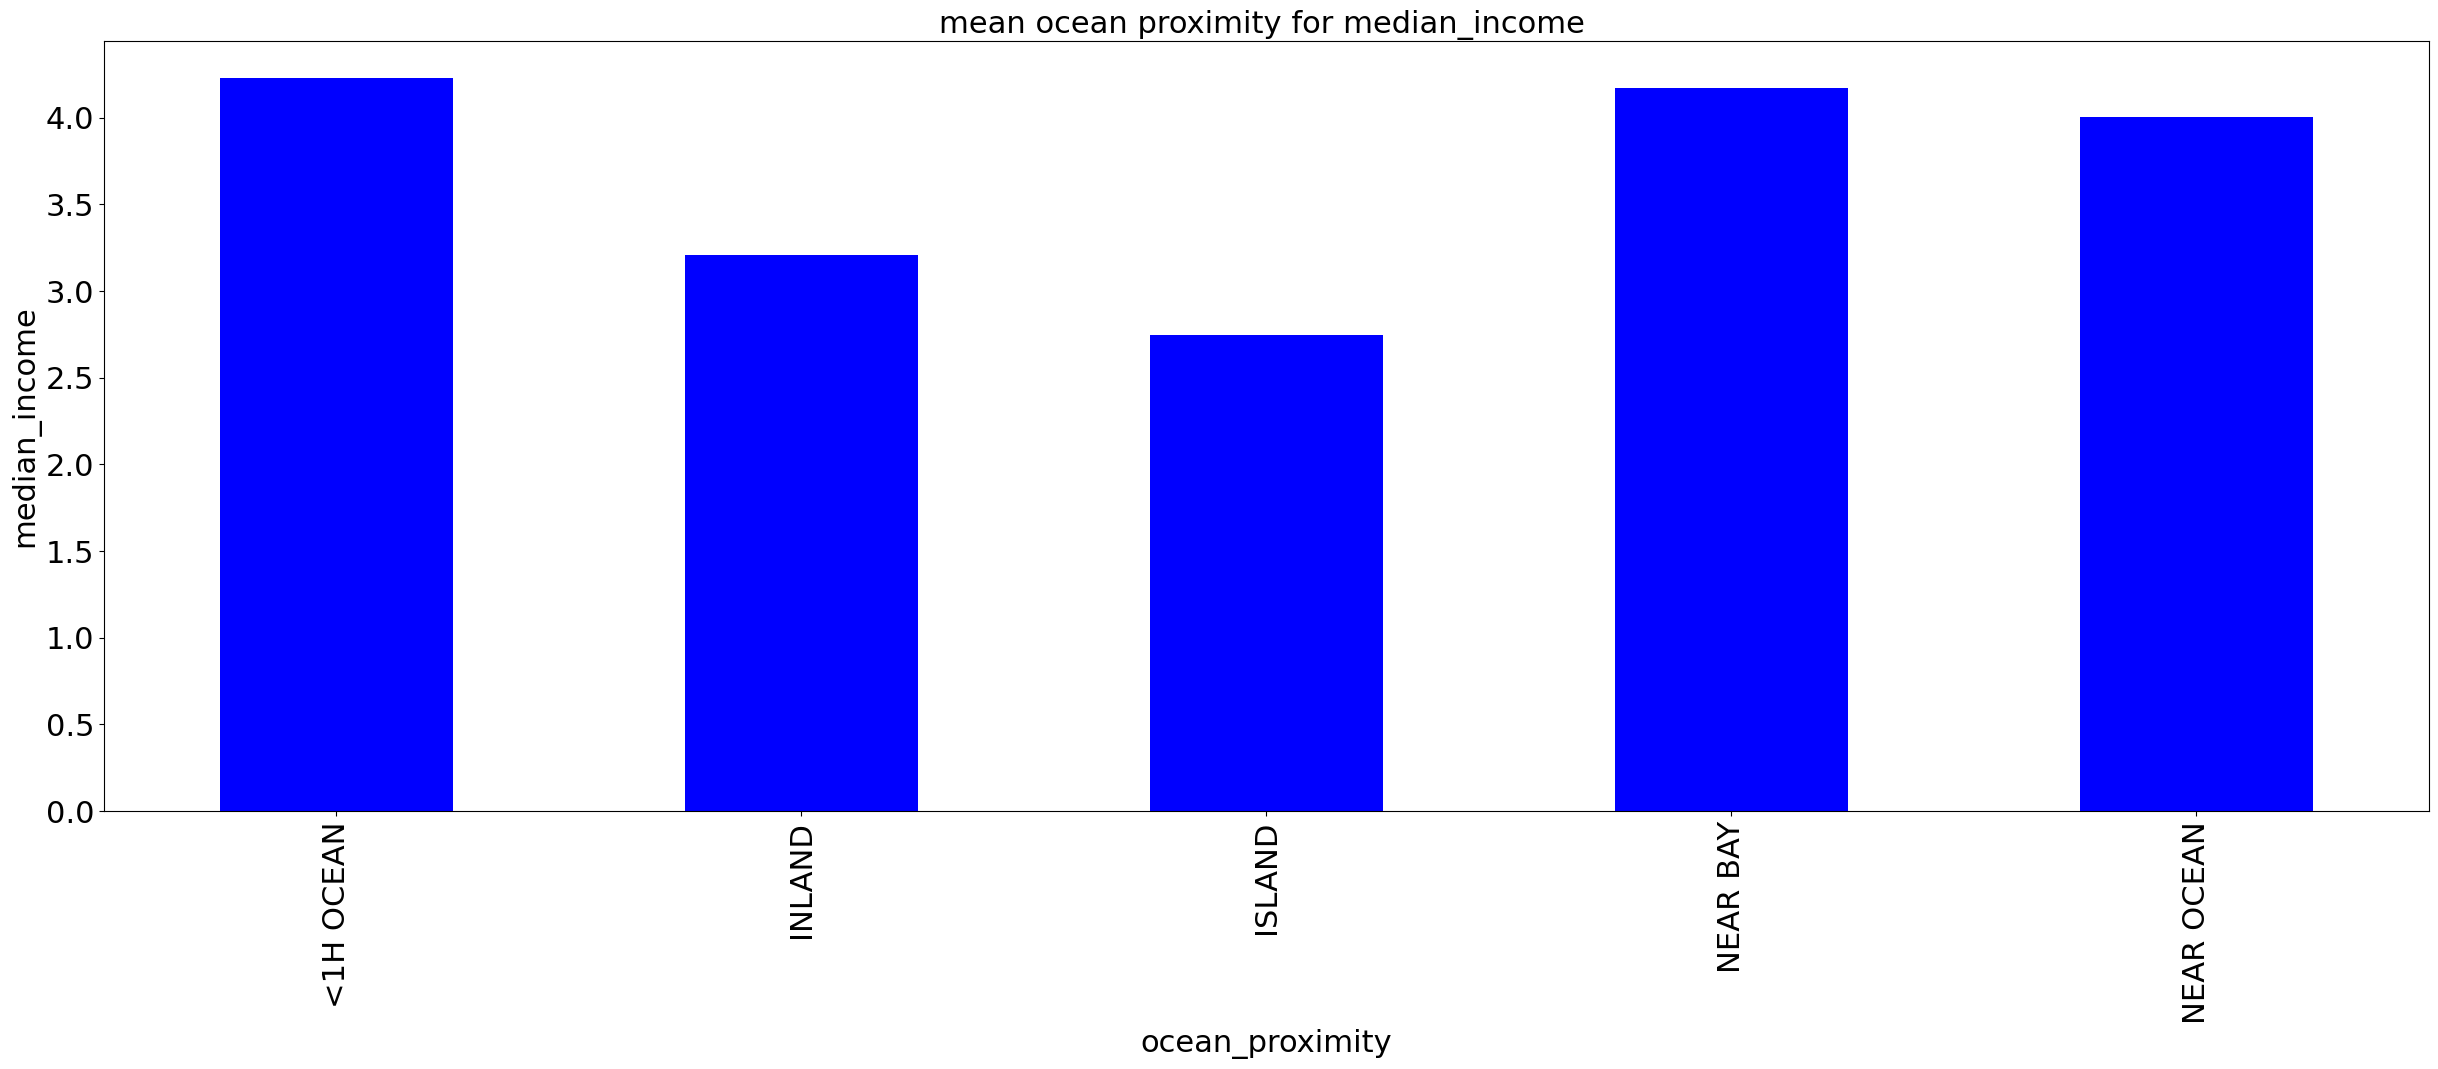

In [59]:
# define function for plotting a kind of graph takes two vectores - decide operation(mean or sum)
def plot(graph, xvec, yvec, xlabel, ylabel, title, op):
    if op == 0: # compute sum
        gb = df1.groupby(xvec)[yvec].sum()
    elif op == 1: # compute mean
        gb = df1.groupby(xvec)[yvec].mean()
        
    #start plotting the graph 
    ax = gb.sort_index().plot(kind=graph,figsize=(30,10), color="blue", fontsize=22);
    # title 
    ax.set_title(title,fontsize=22)
    #xlabel
    ax.set_xlabel(xlabel , fontsize=22);
    #ylabel
    ax.set_ylabel(ylabel, fontsize=22);
    # display the plot
    plt.show()
#Display'mean ocean proximity for median_income
plot('bar', 'ocean_proximity', 'median_income', 'ocean_proximity','median_income', 'mean ocean proximity for median_income ' , 1)

# Research Question 9: ocean_proximity per households

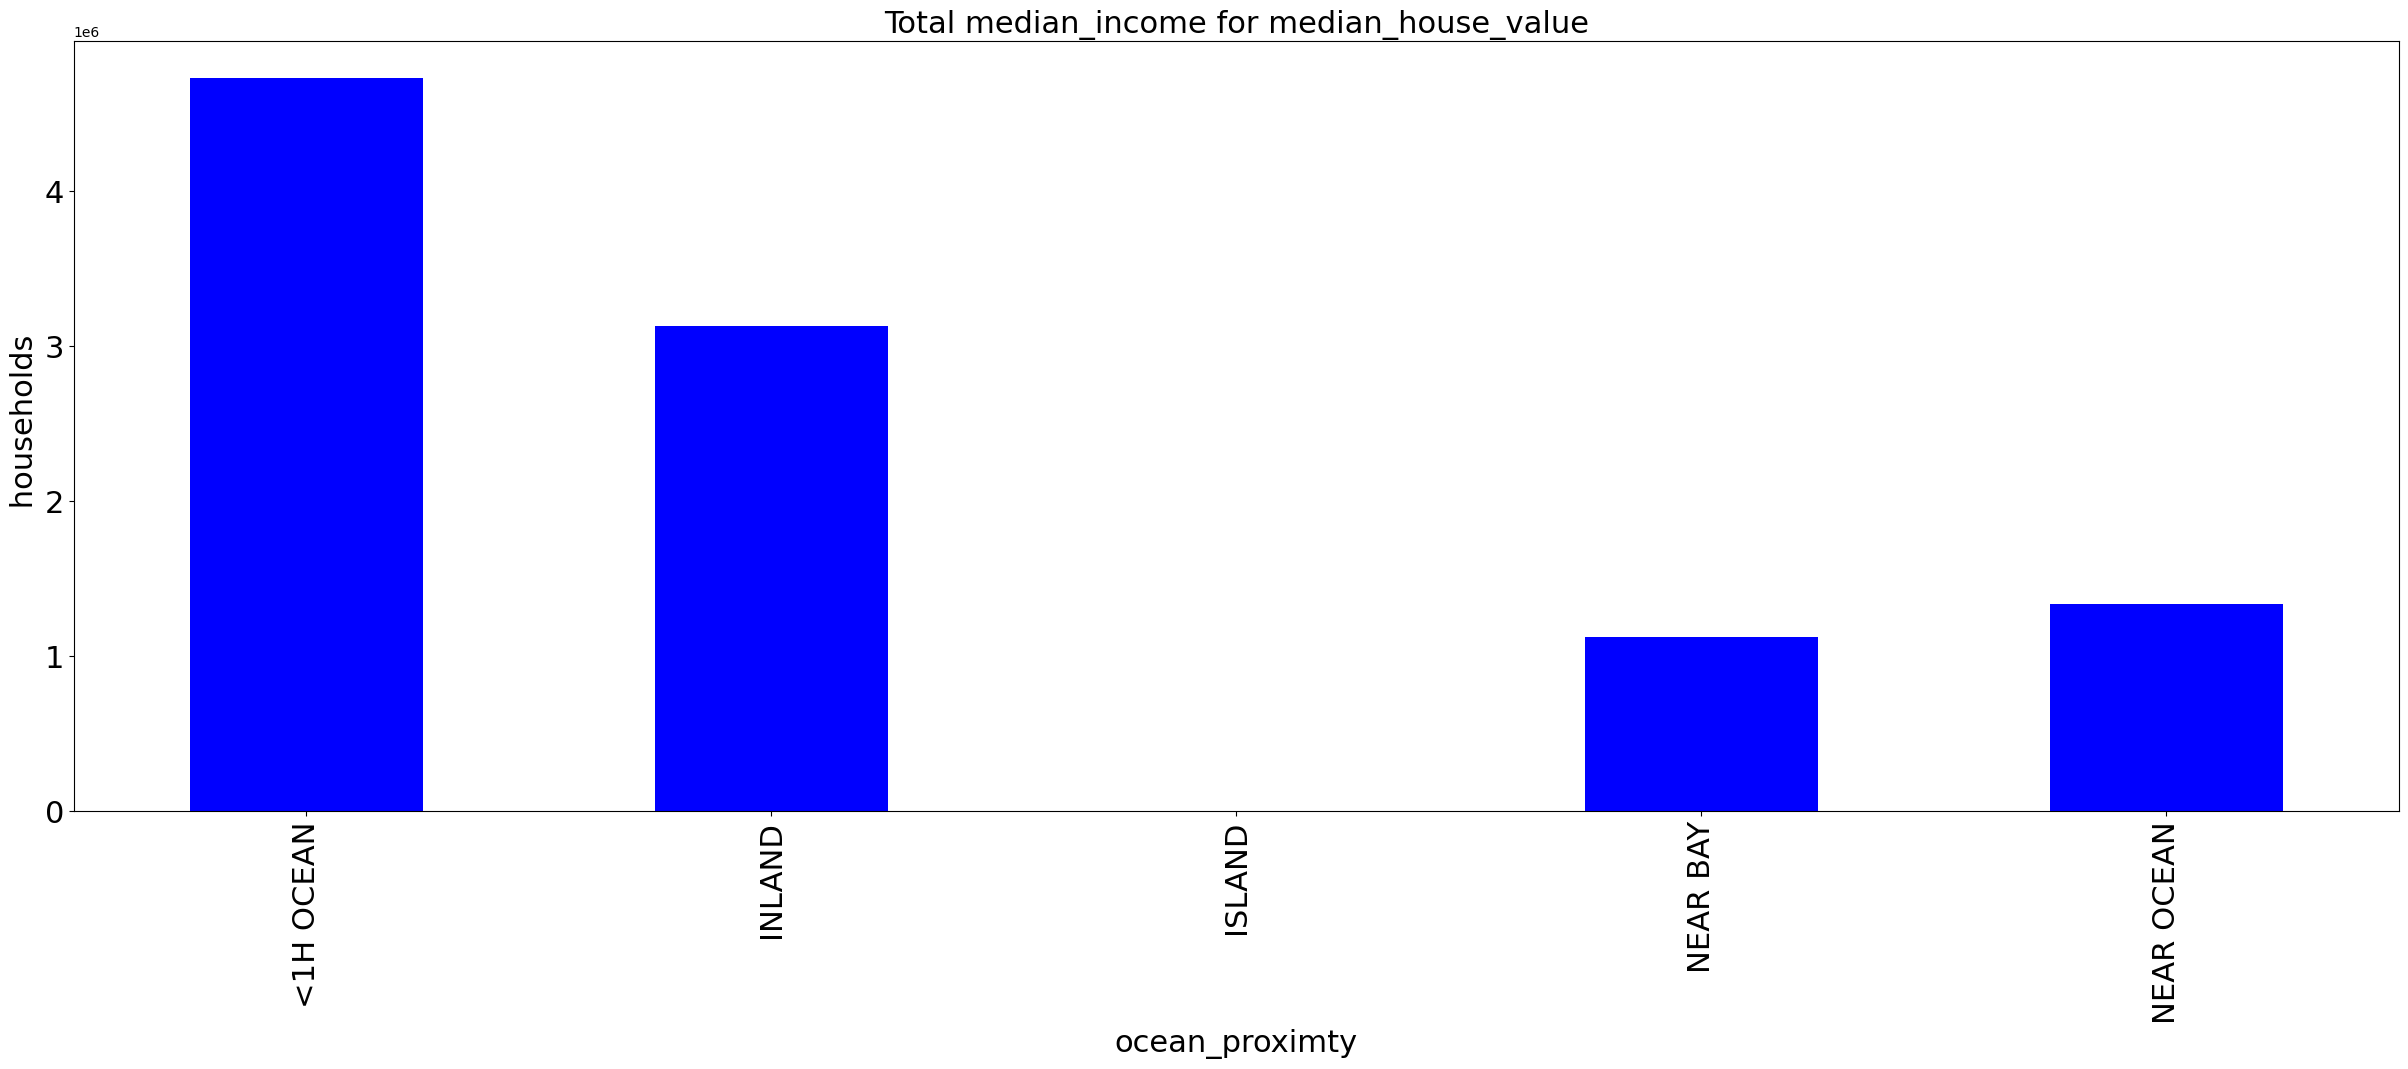

In [60]:
#Display Total median_income for median_house_value

# call function for plotting
plot('bar', 'ocean_proximity', 'households', 'ocean_proximty',' households', 'Total median_income for median_house_value' , 0)

the graph shows that the <1h ocean has the hightest of the households 

# Research Question 10: ocean_proximity per housing_median_age

Text(0, 0.5, 'ocean_proximity')

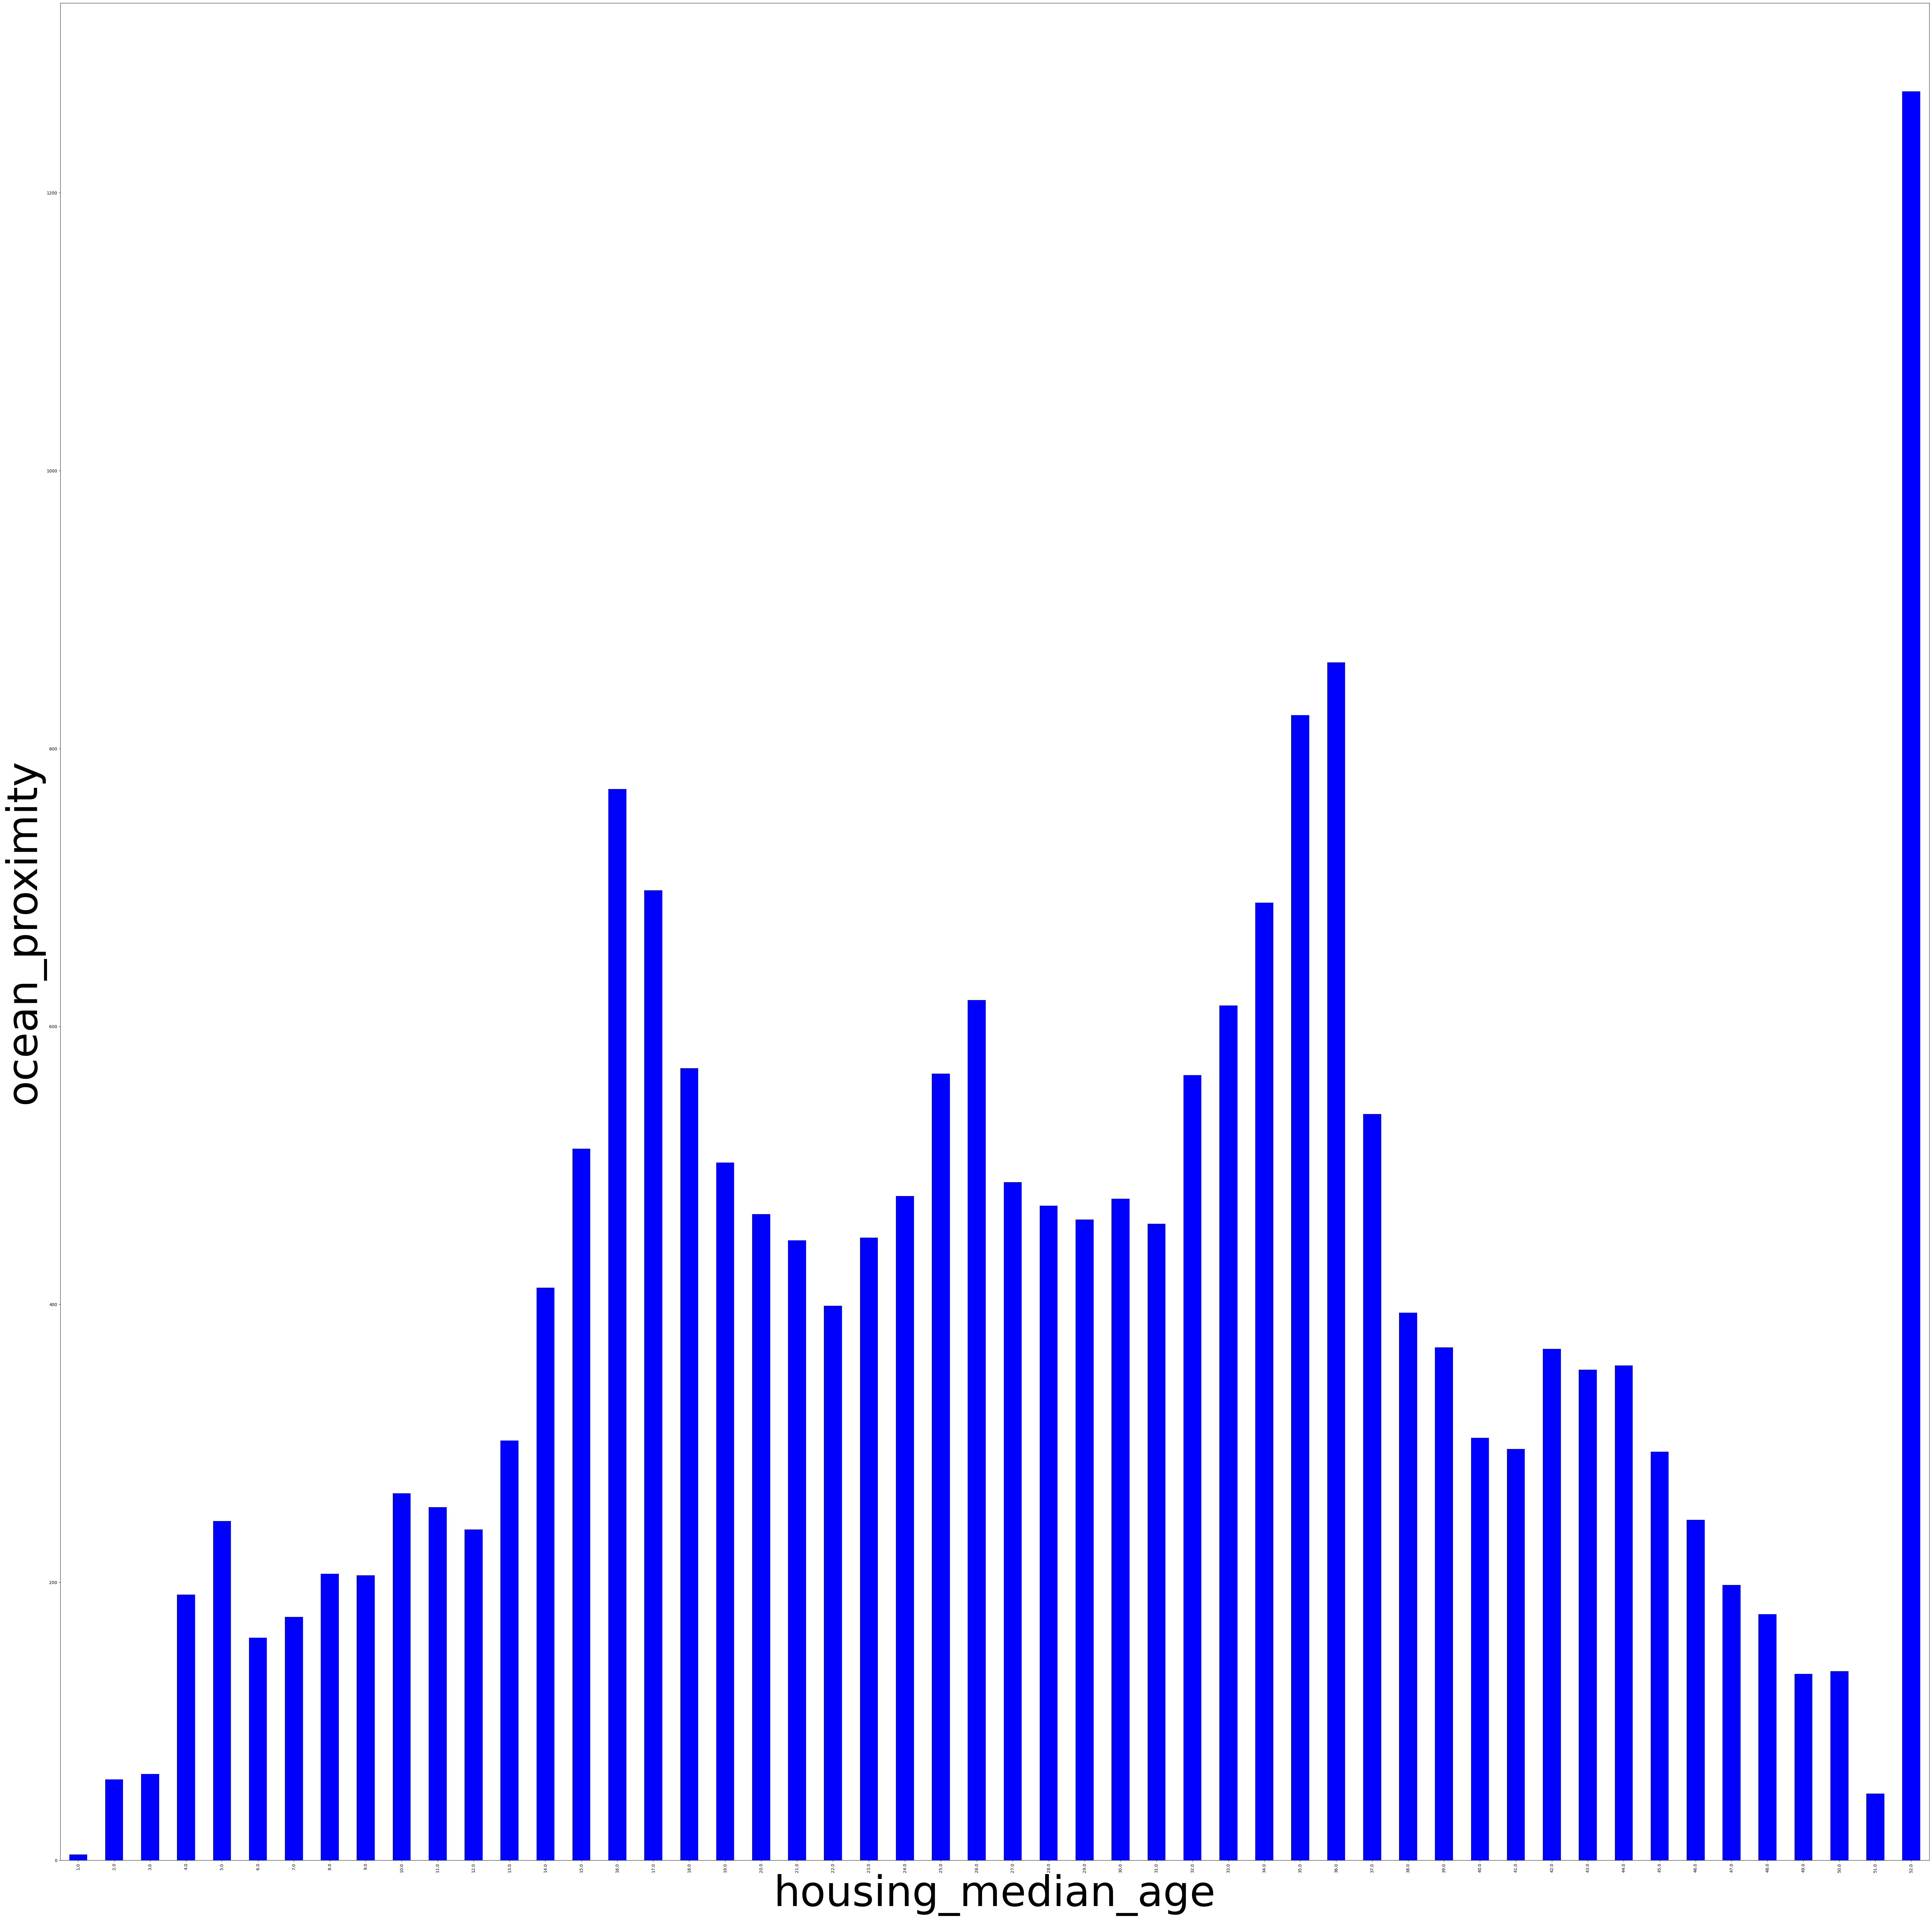

In [21]:
df1['housing_median_age'].value_counts().sort_index().plot(kind=  'bar' , figsize=(80,80) ,color ='blue')
plt.xlabel('housing_median_age',fontsize=100)
plt.ylabel('ocean_proximity',fontsize=100)



# Building ML Model

### 1. Linear Regression:



#### defining X 

In [196]:
# specify the row and column positions by integers ( integer-location )
X = df1.iloc[:, :9]  
Y = df1['median_house_value'] 

#### Train and Test Split

In [114]:
# testing split the data 
# Split the data :
#Split the Dataset
x = df1.drop (columns='ocean_proximity',axis=1) # Features
y = df1['ocean_proximity'] # Target
# Split to train full and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True, random_state=123)

In [115]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [116]:
y

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [130]:
df1 = pd.read_csv(r"D:\new folder22\housing.csv")
print(df1.isna().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


#### model fitting

In [133]:
print(y)

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object


In [134]:
print(np.isnan(X).any())

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool


In [136]:
df1 = df1.dropna()

In [141]:
# Load the iris dataset
iris = load_iris()
X_train = iris.data
Y_train = iris.target

# Reshape the variables to have compatible shapes
X_train = X_train.reshape(-1, 4) # 4 number of features
Y_train = Y_train.reshape(-1) # make y --> 1D array

# Impute the missing or infinite values in X_train
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)


LinearRegression()

### Testing

In [145]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_test = imputer.fit_transform(X_test)


In [146]:
import pandas as pd
X_test = pd.DataFrame(X_test)
X_test = X_test.dropna()


### Prediction:

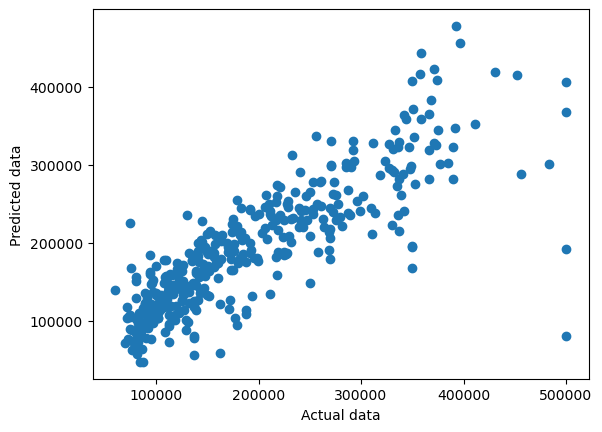

In [185]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_csv("D:/new folder22/housing.csv") # or "D:\\new folder22\\housing.csv"
df1.head()

df1=df1.iloc[:500]
df1.shape
df1.isnull().sum()

df1['total_bedrooms'].fillna(df1['total_bedrooms'].median(),inplace=True)
df1.isnull().sum()
X=df1.drop(columns=['median_house_value','ocean_proximity'],axis=1)
Y=df1['median_house_value']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
reg=LinearRegression()
reg.fit(X_train,Y_train)
training_data_prediction=reg.predict(X_train)
reg.score(X_train,Y_train)

plt.scatter(Y_train,training_data_prediction)
plt.ylabel("Predicted data")
plt.xlabel("Actual data")
plt.show()

## classification 

In [172]:
import pandas
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn import metrics
df1=pandas.read_csv("D:/new folder22/housing.csv") # or "D:\\new folder22\\housing.csv"
print(df1)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [178]:
feature=['longitude', 'latitude',]
X=df1[feature]
y=df1['population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)
print ("Accuracy", metrics.accuracy_score(y_test, y_pred))
print(df1)

[ 488. 3903.  398. ... 1151. 2279.  993.]
Accuracy 0.00048449612403100775
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785

In [180]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x,y)
print(clf.predict([[41,0]]))

[567.]


C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


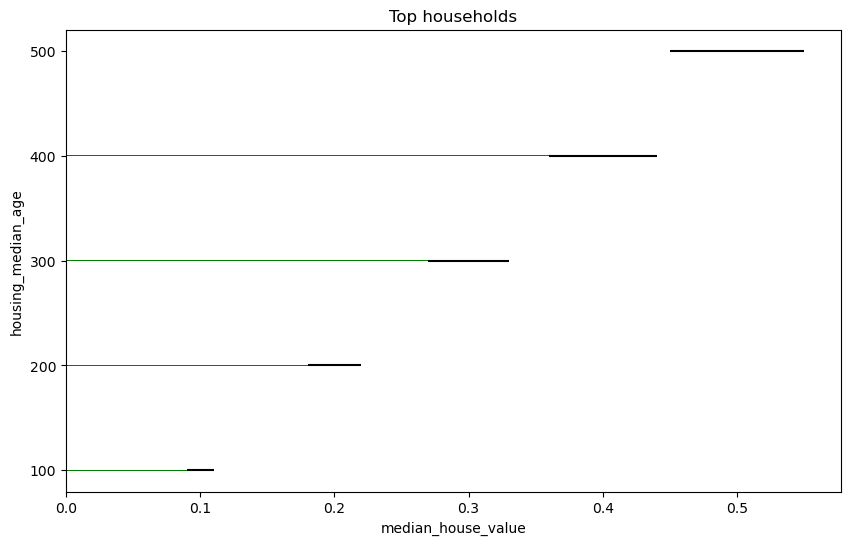

<Figure size 640x480 with 0 Axes>

In [30]:

# Create some sample data
population = [100, 200, 300, 400, 500]
ocean_proximity = [0.1, 0.2, 0.3, 0.4, 0.5]
error = [0.01, 0.02, 0.03, 0.04, 0.05]
# Create figure and axes
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

# Create bar chart
ax.barh(population, ocean_proximity, xerr=error, color='green', height=0.8, align='center')

# Add labels and title
ax.set_xlabel('median_house_value')
ax.set_ylabel('housing_median_age')
ax.set_title('Top households')
ax.set_yticks(population)
ax.set_yticklabels(population)

# Show and save plot
plt.show()
plt.savefig('bar_chart.png')


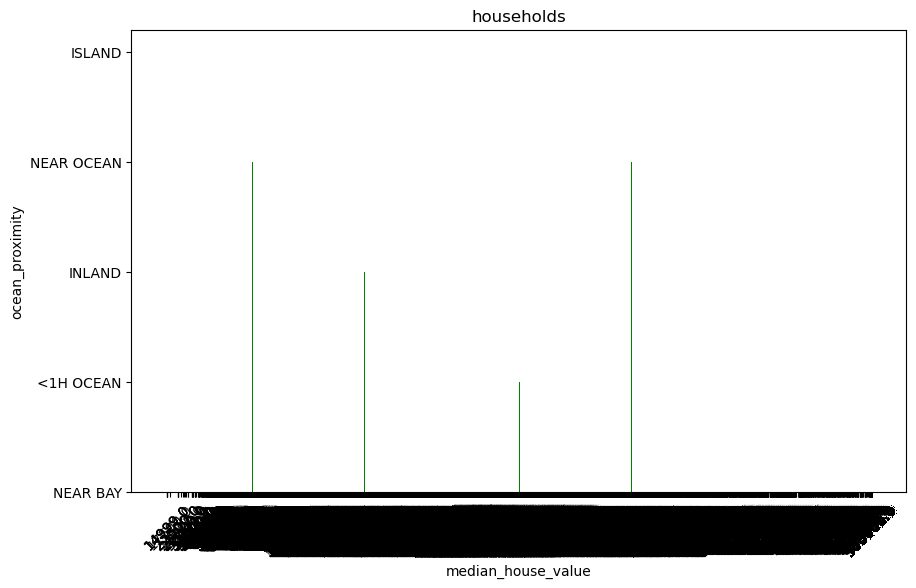

In [35]:
# Create figure and axes
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

# Create bar chart
ax.bar(df1['median_house_value'], df1['ocean_proximity'], color='green', width=0.8, align='center')

# Add labels and title
ax.set_xlabel('median_house_value')
ax.set_ylabel('ocean_proximity')
ax.set_title('households')
ax.set_xticks(df1['median_house_value'])
ax.set_xticklabels(df1['median_house_value'], rotation=45)

# Show and save plot
plt.show()

# Another ML model :


In [64]:

y=df1.median_house_value.values
print(y)
y=df1.median_house_value.values.reshape(-1,1)
y

[452600. 358500. 352100. ...  92300.  84700.  89400.]


array([[452600.],
       [358500.],
       [352100.],
       ...,
       [ 92300.],
       [ 84700.],
       [ 89400.]])

In [72]:
x=df1.median_income.values
print(x)
x=df1.median_income.values.reshape(-1,1)
x

[8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886]


array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [73]:
x.shape,y.shape

((20640, 1), (20640, 1))

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16512, 1), (4128, 1), (16512, 1), (4128, 1))

In [76]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [77]:
lm.coef_,lm.intercept_
y_pred=lm.intercept_+lm.coef_*x_train
y_pred

array([[150071.5284987 ],
       [206233.86092505],
       [245025.27731945],
       ...,
       [175922.70127238],
       [211690.53970751],
       [226264.01795997]])

In [78]:
y_pred=lm.predict(x_test)
y_pred

array([[189729.81558225],
       [384273.18690923],
       [235862.41225727],
       ...,
       [172643.66866558],
       [ 89662.78602982],
       [134568.36284048]])

In [81]:
mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))

(63431.38039170521, 85009.39362368094)

In [104]:
y_test,y_pred

(array([[238800.],
        [423400.],
        [136900.],
        ...,
        [265800.],
        [ 63800.],
        [ 94800.]]),
 array([[189729.81558225],
        [384273.18690923],
        [235862.41225727],
        ...,
        [172643.66866558],
        [ 89662.78602982],
        [134568.36284048]]))

In [105]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape,y_train.shape, x_test.shape,y_test.shape
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [106]:
y.min(),y.max()

(14999.0, 500001.0)

In [107]:
# Prediction for test dataset
y_test_pred=lm.predict(x_test)
print('MAE of Polynomial regressions is .. ',mean_absolute_error(y_test,y_test_pred))

MAE of Polynomial regressions is ..  64063.814092494424


In [108]:
print(y_test_pred.flatten().shape)

(4128,)


In [91]:
# Import the pandas module
import pandas as pd

# Define the load_df1 function
def load_df1():
    # Read the CSV file and return the data frame
    return pd.read_csv(r"D:\new folder22\housing.csv")

In [92]:
df1_dataset = load_df1()
df1_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


0.0